# Dipolo de Media Onda

El dipolo de media onda es un tipo elemental de antena resonante. Para simular el campo electromagnético radiado por el dipolo, elegimos un entorno de simulación 2D de 200 × 200 nodos. 
La longitud de onda λ se fija en 100 nodos; por lo tanto, el dipolo de media onda tendrá una longitud de 50 nodos y estará orientado en la dirección del eje Y. 
La configuración del dipolo y la posición de la fuente se muestran en la figura.


Para la excitación usamos una fuente con el componente $( E_y )$ del campo electromagnético. 
La frecuencia de la señal armónica que excita el dipolo será en un entorno normalizado$ (( c = 1 ))$:

$[
f = \frac{c}{\lambda} = \frac{1}{100} = 0.01
]$

El período $( T )$ de la señal armónica será en unidades de tiempo normalizadas:

$[
T = \frac{1}{f} = 100
]$

El material del dipolo es metal con $( \epsilon_r = -\infty )$. 
La fuente está ubicada en el centro del espacio entre los brazos del dipolo, en un medio conductor con $( \sigma_D = 0.05 )$.

In [3]:
# configuraciones iniciales
import meep as mp 
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
f = 0.01                          # Frecuencia de la fuente (normalizada)
area = mp.Vector3(200, 200, 0)    # Tamaño del entorno de simulación (2D)

# Geometría del dipolo:
# - Dos bloques metálicos (brazos del dipolo) de 24 nodos de longitud.
# - Un bloque central conductor (espacio entre brazos) con conductividad σ_D = 0.05.
dip = [
    mp.Block(
        size=mp.Vector3(1, 24),   # Tamaño del bloque (ancho x altura)
        center=mp.Vector3(0, 12), # Centro del brazo superior
        material=mp.metal
    ),
    mp.Block(
        size=mp.Vector3(1, 24),   # Tamaño del bloque (ancho x altura)
        center=mp.Vector3(0, -12),# Centro del brazo inferior
        material=mp.metal
    ),
    mp.Block(
        size=mp.Vector3(1, 2),    # Espacio entre los brazos
        center=mp.Vector3(0, 0),  # Centro del espacio
        material=mp.Medium(D_conductivity=0.05)  # Medio conductor
    )
]

# Configuración de la fuente:
# - Fuente continua con frecuencia f.
# - Componente del campo eléctrico: Ey (orientación vertical).
# - Posicionada en el centro (0, 0).
src = [
    mp.Source(
        mp.ContinuousSource(frequency=f),
        component=mp.Ey,
        center=mp.Vector3(0, 0, 0)
    )
]

# Creación de la simulación:
# - Tamaño de la celda: 200x200.
# - Capas PML (Perfectly Matched Layers) de grosor 2.0 para absorber ondas en los bordes.
# - Geometría y fuentes definidas.
# - Resolución: 2 píxeles por unidad (400x400 píxeles efectivos).
sim = mp.Simulation(
    cell_size=area,
    boundary_layers=[mp.PML(2.0)],
    geometry=dip,
    sources=src,
    resolution=2
)

# Ejecutar la simulación por 230 pasos de tiempo (equivalente a 2 períodos T).
sim.run(until=230)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000290871 s
Working in 2D dimensions.
Computational cell is 200 x 200 x 0 with resolution 2
     block, center = (0,12,0)
          size (1,24,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (0,-12,0)
          size (1,24,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (0,0,0)
          size (1,2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.202538 s
time for set_conductivity = 0.00560188 s
time for set_conductivity = 0.005548 s
time for set_conductivity = 0.00559402 s
-----------
run 0 finished at t = 230.0 (920 timesteps)


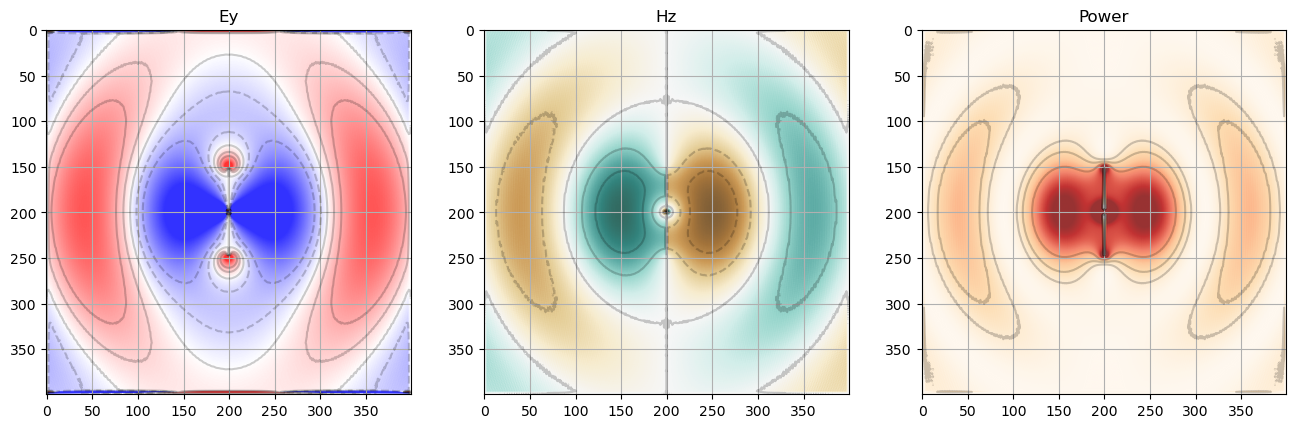

In [2]:
eps = sim.get_array(center=mp.Vector3(), size=area, component=mp.Dielectric)

pw = sim.get_array(center=mp.Vector3(), size=area, component=mp.EnergyDensity)
ey = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ey)
hz = sim.get_array(center=mp.Vector3(), size=area, component=mp.Hz)

fig = plt.figure(dpi=100, figsize=(16,8))
ax = fig.add_subplot(131)
ax.imshow(ey.transpose(), interpolation='spline36', cmap='bwr', alpha=1.0,norm=plt.Normalize(-0.05, 0.05))
ax.contour(ey.transpose(), levels=[-0.02, -0.01, 0.0, 0.01, 0.02], colors="k", alpha=0.2)
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
ax.grid()
ax.set_title('Ey')

ax = fig.add_subplot(132)
ax.imshow(hz.transpose(), interpolation='spline36', cmap='BrBG', alpha=1.0, norm=plt.Normalize(-0.07, 0.07))
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
ax.contour(hz.transpose(), levels=[-0.05, -0.03, 0.0, 0.03, 0.05], colors="k", alpha=0.2)
ax.set_title('Hz')
ax.grid()

ax = fig.add_subplot(133)
ax.imshow(pw.transpose(), interpolation='spline36', cmap='OrRd', alpha=1.0,norm=plt.Normalize(-0.000, 0.004))
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
plt.contour(pw.transpose(), levels=[0.0005, 0.001, 0.002], colors="k", alpha=0.2)
ax.grid()
ax.set_title('Power')
plt.show()